# Feature Selection

** 정의 **
- 실무에서는 대규모 데이터 기반의 분류예측 모형 만들어야 한다.
   - 대규모 데이터 : 표본 갯수가 많거나, 독립변수 즉 특징데이터의 종류가 많거나, 두가지 다 많은 데이터
- 특징 데이터 종류가 많은 경우 가장 중요한 것을 선택하여 종류를 줄이는 방법
- 예측모형에서 중요한 특징 데이터
   - 종속데이터(target)와 상관관계가 크고 예측에 도움이 되는 데이터
   - 상관관계의 계산에 앞서 독립변수의 값 자체가 표본(데이터 샘플)에 따라서 변하지 않으면 예측에 도움이 되지 않을 수 있다.
   - 즉 집값 데이터 세트에서 각 집별 샘플 데이터에 따라서 방의 갯수 독립변수의 값 자체가 일정하거나 큰 변화가 없는 경우

** 분산에 의한 선택 **
- 표본의 변화에 따라서 데이터 값의 변화, 즉 분산이 기준치보다 낮은 특징데이터는 사용하지 않는 방법
   - 종속변수와 어떤 독립변수의 데이터가 0, 1로 이루어져 있는 경우 종속변수는 균형을 이루지만 독립변수의 데이터의 90% 이상이 0으로만 이루어진 경우 이 독립변수는 예측에 도움이 되지 않을 가능성이 높다는 것.
- 분산선택은 상관관계와 반드시 일치하는 것은 아니다. 상황에 따라서 사용해야한다.
- 클래스 사용
   - from sklearn.feature_selection import VarianceThreshold
   - var_selector = VarianceThreshold(1e-5) : threshold 값을 기준으로 제거한다.
   - X_train_sel = var_selector.fit_transform(X_train)
   - X_test_sel = var_selector.transform(X_test)   ## transform 만 사용

** 단일 변수 선택 **
- 독립변수를 하나만 사용하여 예측모형의 성능을 측정한 후 분류성능 또는 상관관계가 높은 변수만 선택하는 방법
- 단일 변수의 성능이 높은 것만 모아놓았다고 해서 모형의 성능이 반드시 좋아지는 것은 아니다.
- 성능 지표
   - chi2 : 카이제곱 검정 통계값
   - f_classif : 분산분석(ANOVA) F검정 통계값
   - mutual_info_classif : 상호정보량 (mutual information)
- 클래스 사용
   - from sklearn.feature_selection import chi2, SelectKBest
   - selector = SelectKBest(chi2, k=14330) : 성능 지표 통계값 클래스와 best feature의 갯수를 입력한다.
   - X_train_sel = selector.fit_transform(X_train, y_train)  ## X_train, y_train을 입력
   - X_test_sel = selector.transform(X_test)

** 특성 중요도 계산 **
- DT, RF, ET 등의 의사결정나무 모형은 특성 중요도 값을 속성값으로 반환한다.
   - clf.feature_importances_
- 특성 중요도를 계산하여 feature를 선택한 후 최종 분류는 다른 모형을 사용한다.
- 클래스 사용
   - from sklearn.ensemble import ExtraTreesClassifier
   - from sklearn.feature_selection import SelectFromModel
   - model_sel = ExtraTreesClassifier(n_estimators=100).fit(X_trian, y_train)
   - selector = SelectFromModel(model_sel, prefit=True, max_features=14330)
   - X_train_sel = selector.fit_transform(X_train)
   - X_test_sel = selector.transform(X_test)

** sklearn feature selection docs **
- feature_selection 모듈의 클래스는 고차원의 데이터 세트에서 성능을 높이기 위해 feature 선택, 차원축소 등 샘플링하는데 사용할 수 있다.
- fitting 전 전처리 단계에서 사용된다.
   - pipeline에서 사용
- 낮은 분산의 feature 제거
   - VarianceThreshold(threshold={"float"})
   - 모든 데이터 샘플에서 동일한 값을 갖는, 즉 분산이 0에 가까운 feature를 제거하는 방식
   - threshold 값을 설정하여 분산값의 기준으로 사용할 수 있다. 
- 단변량 특징 선택
   - 단변량 통계 테스트를 기반으로 최상의 feature 를 선택 하는 방법
   - SelectKBest() : k째로 높은 score feature를 제외하고 모든 feature를 제거한다.
   - SelectPercentile() : 설정한 최고 점수 비율을 제외한 모든 feature를 제거한다.
   - SelectFpr() : 위양성율 기준
   - SelectFdr() : 허위발견율 기준
   - SelectFwe() : 가족의 실수 기준 (??)
   - 단변량 특징선택 방법에 사용할 수 있는 p-value 지표들
      - regression : r_regression, f_regression, mutual_info_regression
      - classification : chi2, f_classif, mutual_info_classif
      - chi2는 카이제곱 통계값으로, non-negative feature의 경우만 사용
      - f_classif는 ANOVA F-value 값으로 두 feature간의 선형종속성 추정, 
      - mutual_info_classif는 상호정보량 값으로, 변수간의 모든 종속성 측정, 두 feature가 독립이고, 종속성이 높은 경우 0
- 재귀적 변수 선택방법도 있음
- SelectFromModel 방법
   - coef_, feature_importances_ 을 반환하는 모형을 사용할 수 있다.
   - threshold 보다 낮으면 중요하지 않은 feature로 제거된다.
   - max_features 매개변수를 사용하여 feature 수의 제한을 설정할 수 있다.
- L1-based 변수 선택법
   - SelectFromModel() 클래스에서 linear model의 penalty 매개변수의 L1norm 값을 사용하여 변수선택을 할 수도 있다.
   - L1 norm 값은 가중치 추정값으로 다수가 0인 희소 행렬과 같다. 
   - 0 이 아닌 coef를 선택하는 방식
   - Lasso, LogisticRegression, LinearSVC를 사용해 희소 추정기를 계산할 수 있다. 
   - 다중 클래스의 분류 문제는 LR을 사용할 수 있다. 
- 순차적 변수선택 Sequential Feature Selection SFS
   - SequentialFeatureSelector()
   - cv score을 사용하므로 여러 모형을 사용할 수 있다.
   - forward-SFS : 선택된 feature에 추가할 최상의 feature를 반복적으로 탐색하는 탐욕적 greedy 절차이다.
      - 처음에는 0개의 feature로 시작하여 cv score를 최대화하는 feature를 찾아서 추가한 후 반복한다.
      - n_feature_to_select 매개변수에 feature의 갯수를 설정할수 있다.
   - backward-SFS : 
      - 반대방향으로 반복한다. 모든 feature에서 시작하여 cv score가 높은 방향으로 feature 를 제거해 나간다.
   - n_feature_to_select : feature 갯수
   - direction : 방향 선택
   - 추정기로 ETC를 사용하는 경우, 시간이 오래 걸린다.   
   - 참고
      - 모델에 기반한 순차적 변수선택 : feature importance에 기반한 SelectFromModel과 그리디 접근방식에 의존하는 SequentialFeatureSelector를 사용하여 비교
      - https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py
- tips
   - SFS 는 내부 추정기로 RF, ETC 등을 사용하면 시간이 더 오래 걸리 수 있다.
   - SFS 는 backward 방향에서 tol 값을 음수로 설정하면 0에 가까울 수록 속도가 빨라지고 성능이 나아진다.
   - SFM 은 l1, coef_, feature_importances 을 출력하는 추정기를 사용할 수 있다. 
   - SFM 의 feature_importances 를 사용할 수 있으므로 좀 더 신뢰가 간다.

** 변수선택법의 pipeline 적용 **
- pipeline에 추가하여 변수를 선택한 후 다른 모형으로 예측 해도 된다.

In [1]:
from sklearn.datasets import fetch_rcv1

In [2]:
rcv_train = fetch_rcv1(subset="train")
rcv_test = fetch_rcv1(subset="test")
X_train = rcv_train.data
y_train = rcv_train.target
X_test = rcv_test.data
y_test = rcv_test.target

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23149, 47236), (781265, 47236), (23149, 103), (781265, 103))

In [7]:
help(fetch_rcv1)

Help on function fetch_rcv1 in module sklearn.datasets._rcv1:

fetch_rcv1(*, data_home=None, subset='all', download_if_missing=True, random_state=None, shuffle=False, return_X_y=False)
    Load the RCV1 multilabel dataset (classification).
    
    Download it if necessary.
    
    Version: RCV1-v2, vectors, full sets, topics multilabels.
    
    =================   =====================
    Classes                               103
    Samples total                      804414
    Dimensionality                      47236
    Features            real, between 0 and 1
    =================   =====================
    
    Read more in the :ref:`User Guide <rcv1_dataset>`.
    
    .. versionadded:: 0.17
    
    Parameters
    ----------
    data_home : str, default=None
        Specify another download and cache folder for the datasets. By default
        all scikit-learn data is stored in '~/scikit_learn_data' subfolders.
    
    subset : {'train', 'test', 'all'}, default='all'
  

In [13]:
rcv_train.target.shape

(23149, 103)

In [8]:
classes = np.arange(rcv_train.target.shape[1])
classes

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102])

In [14]:
y_train = y_train.dot(classes)
y_test = y_test.dot(classes)

In [17]:
y_train.shape

(23149,)

In [18]:
y_test.shape

(781265,)

## VarianceThreshold()

In [20]:
from sklearn.feature_selection import VarianceThreshold

In [29]:
# 표본의 변화에 따른 feature 값의 분산을 계산하여 불필요한 feature를 제거

var_selector = VarianceThreshold(1e-5)
X_train_sel = var_selector.fit_transform(X_train)
X_test_sel = var_selector.transform(X_test)

X_train_sel.shape, X_test_sel.shape

((23149, 14330), (781265, 14330))

In [31]:
X_train.shape, X_train_sel.shape

((23149, 47236), (23149, 14330))

In [30]:
X_test.shape, X_test_sel.shape

((781265, 47236), (781265, 14330))

In [26]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [27]:
%%time

model = BernoulliNB()
model.fit(X_train, y_train)

print("train acc : {:5.3f}".format(accuracy_score(y_train, model.predict(X_train))))
print("test acc : {:5.3f}".format(accuracy_score(y_test, model.predict(X_test))))

train acc : 0.381
test acc : 0.324
CPU times: total: 17.3 s
Wall time: 17.6 s


In [32]:
%%time

model = BernoulliNB()
model.fit(X_train_sel, y_train)

print("var selector train acc : {:5.3f}"\
      .format(accuracy_score(y_train, model.predict(X_train_sel))))
print("var selector test acc : {:5.3f}"\
      .format(accuracy_score(y_test, model.predict(X_test_sel))))

var selector train acc : 0.529
var selector test acc : 0.441
CPU times: total: 13.9 s
Wall time: 14.8 s


## 단일 변수 선택방법

In [33]:
from sklearn.feature_selection import chi2, SelectKBest

In [35]:
X_train_sel.shape

(23149, 14330)

In [37]:
%%time

kbest_selector = SelectKBest(chi2, k=14330)
X_train_kbest = kbest_selector.fit_transform(X_train, y_train)
X_test_kbest = kbest_selector.transform(X_test)

model = BernoulliNB()
model.fit(X_train_kbest, y_train)

print("kbest select train acc : {:5.3f}"\
      .format(accuracy_score(y_train, model.predict(X_train_kbest))))
print("kbest select test acc : {:5.3f}"\
      .format(accuracy_score(y_test, model.predict(X_test_kbest))))

kbest select train acc : 0.505
kbest select test acc : 0.438
CPU times: total: 11.8 s
Wall time: 12 s


## 특성 중요도 계산 방법
- DT, RF, ET 등 의사결정나무 계열의 모형은 특성 중요도를 반환한다.
- 이를 사용하여 feature를 선택한 후 예측 모형은 다른 것을 사용하는 방식.

In [38]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

In [40]:
%%time

# 랜덤 샘플링
n_sample = 10000
idx = np.random.choice(range(len(y_train)), n_sample)
# feature importance 계산을 위한 ET 모형
fimp_model = ExtraTreesClassifier(n_estimators=50).fit(X_train[idx, :], y_train[idx])
# feature importance 를 사용하여 feature select
fimp_selector = SelectFromModel(fimp_model, prefit=True, max_features=14330)
# train, test 데이터 변환
X_train_fimp = fimp_selector.fit_transform(X_train)
X_test_fimp = fimp_selector.transform(X_test)

CPU times: total: 1min 32s
Wall time: 1min 40s


In [41]:
%%time

model = BernoulliNB()
model.fit(X_train_fimp, y_train)

print("feature imp train acc : {:5.3f}"
      .format(accuracy_score(y_train, model.predict(X_train_fimp))))
print("feature imp test acc : {:5.3f}"
      .format(accuracy_score(y_test, model.predict(X_test_fimp))))

feature imp train acc : 0.602
feature imp test acc : 0.491
CPU times: total: 10.7 s
Wall time: 12.6 s


## L1-based 변수선택
- Lasso, LogisticRegression, LinearSVC 를 사용하여 추정 가중치 희소 행렬을 사용

In [44]:
from sklearn.svm import LinearSVC

In [47]:
X_train.shape

(23149, 47236)

In [49]:
%%time

l1_svc = LinearSVC(C=0.01, 
                   penalty="l1", 
                   dual=False).fit(X_train[idx, :], y_train[idx])
l1_selector = SelectFromModel(l1_svc, prefit=True, max_features=14330)
X_train_l1 = l1_selector.fit_transform(X_train)
X_test_l1 = l1_selector.transform(X_test)

model = BernoulliNB()
model.fit(X_train_l1, y_train)

print("l1 based select train acc : {:5.3f}"
      .format(accuracy_score(y_train, model.predict(X_train_l1))))
print("l1 based selet test acc : {:5.3f}"
      .format(accuracy_score(y_test, model.predict(X_test_l1))))

l1 based select train acc : 0.152
l1 based selet test acc : 0.150
CPU times: total: 12.9 s
Wall time: 14.2 s


In [50]:
X_train_l1.shape, X_test_l1.shape

((23149, 4), (781265, 4))

#### LR의 multi_class="auto"

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
%%time

lr_select = LogisticRegression(solver="saga", 
                               penalty="l1",
                               max_iter=150,
                               n_jobs=2).fit(X_train[idx, :], y_train[idx])
lr_selector = SelectFromModel(lr_select, prefit=True, max_features=14330)
X_train_lr = lr_selector.fit_transform(X_train)
X_test_lr = lr_selector.transform(X_test)

model = BernoulliNB()
model.fit(X_train_lr, y_train)

print("logsticR l1 based train acc : {:5.3f}"
      .format(accuracy_score(y_train, model.predict(X_train_lr))))
print("logsticR l1 based test acc : {:5.3f}"
      .format(accuracy_score(y_test, model.predict(X_test_lr))))

logsticR l1 based train acc : 0.617
logsticR l1 based test acc : 0.528
CPU times: total: 5min 28s
Wall time: 5min 52s


#### LR의 multi_class="multinomial"

In [71]:
%%time

lr_model = LogisticRegression(solver="saga", 
                               penalty="l1",
                               max_iter=150,
                               multi_class="multinomial",
                               n_jobs=2).fit(X_train[idx, :], y_train[idx])
l1based_selector = SelectFromModel(lr_model, prefit=True, max_features=14330)
X_train_lr = l1based_selector.fit_transform(X_train)
X_test_lr = l1based_selector.transform(X_test)

model = BernoulliNB()
model.fit(X_train_lr, y_train)

print("logsticR l1 based train acc : {:5.3f}"
      .format(accuracy_score(y_train, model.predict(X_train_lr))))
print("logsticR l1 based test acc : {:5.3f}"
      .format(accuracy_score(y_test, model.predict(X_test_lr))))

logsticR l1 based train acc : 0.618
logsticR l1 based test acc : 0.528
CPU times: total: 5min 36s
Wall time: 5min 55s


In [73]:
X_train.shape, idx.shape

((23149, 47236), (10000,))

In [74]:
lr_select.coef_.shape

(405, 47236)

In [75]:
lr_select.coef_[lr_select.coef_.sum(axis=1) != 0].shape

(129, 47236)

In [76]:
lr_select.coef_[lr_select.coef_.sum(axis=1) == 0].shape

(276, 47236)

In [77]:
X_train_lr.shape, X_test_lr.shape

((23149, 876), (781265, 876))

## sklearn docs

## SelectFromModel과 SequentialFeatureSelector 비교
- feature_importances 값에 기반한 SFM과
- 순차적 변수 선택 방법을 비교
- diabetes 데이터 사용

In [2]:
from sklearn.datasets import load_diabetes

diab = load_diabetes()
X = diab.data
y = diab.target

X.shape, y.shape

((442, 10), (442,))

In [3]:
diab.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

### 계수의 특징 중요도
- RidgeCV 모형을 사용하여 feature_importance 계산
- 절대값 가중치 값이 큰 feature가 중요함

In [5]:
%matplotlib inline

In [6]:
from sklearn.linear_model import RidgeCV

In [7]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)
ridge

RidgeCV(alphas=array([1.e-06, 1.e-03, 1.e+00, 1.e+03, 1.e+06]))

In [9]:
ridge.coef_

array([  -9.54916175, -239.08695779,  520.3693746 ,  323.82274522,
       -712.32215918,  413.37912498,   65.81132269,  167.51300694,
        720.9399241 ,   68.12336029])

In [8]:
imp = np.abs(ridge.coef_)
imp

array([  9.54916175, 239.08695779, 520.3693746 , 323.82274522,
       712.32215918, 413.37912498,  65.81132269, 167.51300694,
       720.9399241 ,  68.12336029])

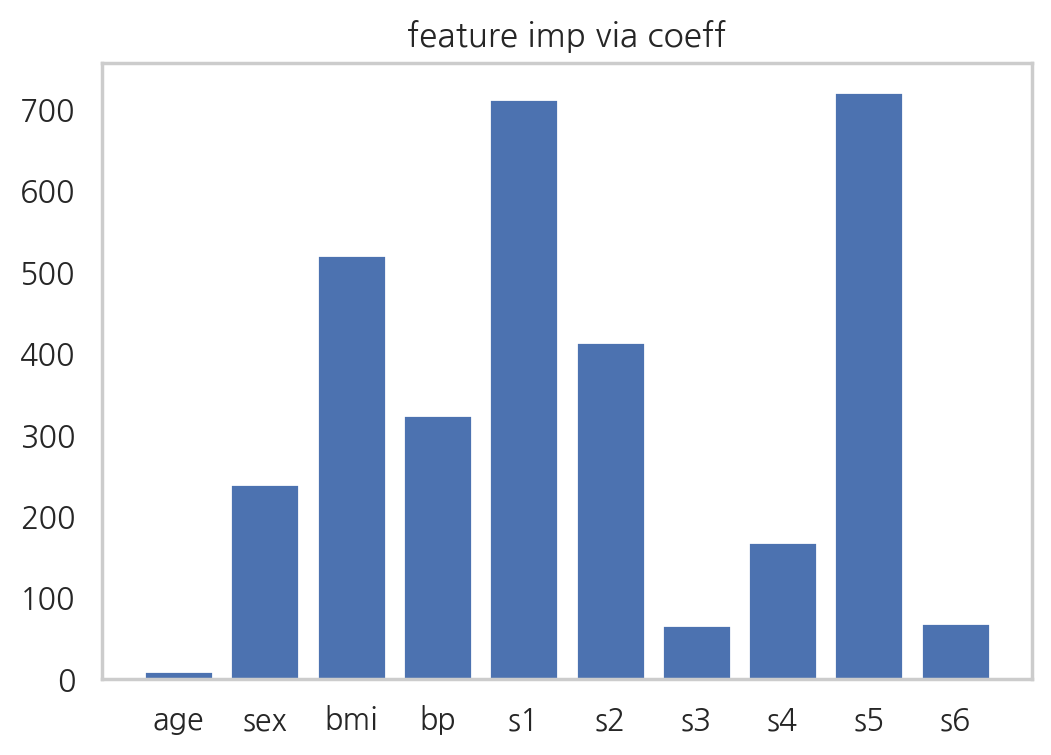

In [11]:
feature_names = np.array(diab.feature_names)
plt.figure()
plt.bar(x=feature_names, height=imp)
plt.grid(False)
plt.title("feature imp via coeff")
plt.show() ; 

### SelectFromModel()에 importance 값을 적용하여 변수선택

In [12]:
from sklearn.feature_selection import SelectFromModel

In [13]:
np.sort(imp)

array([  9.54916175,  65.81132269,  68.12336029, 167.51300694,
       239.08695779, 323.82274522, 413.37912498, 520.3693746 ,
       712.32215918, 720.9399241 ])

In [14]:
thr = np.sort(imp)[-3] + 0.01
thr

520.3793746031438

In [16]:
%%time

sfm = SelectFromModel(ridge, threshold=thr).fit(X, y)
sfm

CPU times: total: 0 ns
Wall time: 2.01 ms


SelectFromModel(estimator=RidgeCV(alphas=array([1.e-06, 1.e-03, 1.e+00, 1.e+03, 1.e+06])),
                threshold=520.3793746031438)

In [17]:
sfm.get_support()

array([False, False, False, False,  True, False, False, False,  True,
       False])

In [20]:
print(f"feature selected by sfm : {feature_names[sfm.get_support()]}")

feature selected by sfm : ['s1' 's5']


### Sequential Feature Selection
- SFS : 반복할 때마다 cv score를 기반으로 feature를 추가한다.
- foward, backward 방향을 설정 가능

In [22]:
from sklearn.feature_selection import SequentialFeatureSelector

In [23]:
import time

In [25]:
tic_fwd = time.time()
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=2, direction="forward").fit(X, y)
end_fwd = time.time()

tic_bwd = time.time()
sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=2, direction="backward").fit(X, y)
end_bwd = time.time()

print("features selected by fwd sfs : "
     f"{feature_names[sfs_forward.get_support()]}")
print(f"Done in {end_fwd - tic_fwd:.3f}s")
print("feature selected by bwd sfs : "
     f"{feature_names[sfs_backward.get_support()]}")
print(f"Done in {end_bwd - tic_bwd:.3f}s")

features selected by fwd sfs : ['bmi' 's5']
Done in 0.167s
feature selected by bwd sfs : ['bmi' 's5']
Done in 0.581s


### SFS의 매개변수 음수 공차
- 매개변수 direction="backward"을 tol=음수로 사용한 경우
- tol 값이 0에 가까워질 수록 속도도 빨라지고 성능도 좋아지는 경향이 있다.

In [36]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()
X, y = bc.data, bc.target
feature_names = bc.feature_names
print(feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [30]:
for tol in [-1e-2, -1e-3, -1e-4] : 
    print(tol)

-0.01
-0.001
-0.0001


In [45]:
for tol in [-1e-1, -1e-2, -1e-3, -1e-4] : 
    start = time.time()
    feature_selector = SequentialFeatureSelector(
        LogisticRegression(),
        n_features_to_select="auto",
        direction="backward",
        scoring="roc_auc",
        tol=tol,
        n_jobs=2)
    
    model = make_pipeline(StandardScaler(), 
                          feature_selector, 
                          LogisticRegression())
    model.fit(X, y)
    end = time.time()
    
    print(f"\ntol: {tol}")
    print(f"features selected : {feature_names[model[1].get_support()]}")
    print(f"roc auc score : {roc_auc_score(y, model.predict_proba(X)[:, 1]):.3f}")
    print(f"Done in {end - start : .3f}s")


tol: -0.1
features selected : ['worst perimeter']
roc auc score : 0.975
Done in  18.174s

tol: -0.01
features selected : ['worst perimeter']
roc auc score : 0.975
Done in  20.022s

tol: -0.001
features selected : ['radius error' 'fractal dimension error' 'worst texture'
 'worst perimeter' 'worst concave points']
roc auc score : 0.997
Done in  19.164s

tol: -0.0001
features selected : ['mean area' 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'radius error' 'perimeter error'
 'area error' 'smoothness error' 'symmetry error'
 'fractal dimension error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area' 'worst concave points' 'worst symmetry'
 'worst fractal dimension']
roc auc score : 0.998
Done in  13.955s


In [46]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sequentialfeatureselector',
                 SequentialFeatureSelector(direction='backward',
                                           estimator=LogisticRegression(),
                                           n_jobs=2, scoring='roc_auc',
                                           tol=-0.0001)),
                ('logisticregression', LogisticRegression())])

In [47]:
model[0]

StandardScaler()

In [48]:
model[1]

SequentialFeatureSelector(direction='backward', estimator=LogisticRegression(),
                          n_jobs=2, scoring='roc_auc', tol=-0.0001)

In [49]:
model[2]

LogisticRegression()

In [51]:
for tol in [1, 1e-1, 1e-2, 1e-3, 1e-4] : 
    start = time.time()
    feature_selector = SequentialFeatureSelector(
        LogisticRegression(),
        n_features_to_select="auto",
        direction="backward",
        scoring="roc_auc",
        tol=tol,
        n_jobs=2)
    
    model = make_pipeline(StandardScaler(), 
                          feature_selector, 
                          LogisticRegression())
    model.fit(X, y)
    end = time.time()
    
    print(f"\ntol: {tol}")
    print(f"features selected : {feature_names[model[1].get_support()]}")
    print(f"roc auc score : {roc_auc_score(y, model.predict_proba(X)[:, 1]):.3f}")
    print(f"Done in {end - start : .3f}s")


tol: 1
features selected : ['mean radius' 'mean perimeter' 'mean area' 'mean smoothness'
 'mean compactness' 'mean concavity' 'mean concave points' 'mean symmetry'
 'mean fractal dimension' 'radius error' 'texture error' 'perimeter error'
 'area error' 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
roc auc score : 0.997
Done in  2.462s

tol: 0.1
features selected : ['mean radius' 'mean perimeter' 'mean area' 'mean smoothness'
 'mean compactness' 'mean concavity' 'mean concave points' 'mean symmetry'
 'mean fractal dimension' 'radius error' 'texture error' 'perimeter error'
 'area error' 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius'

In [52]:
from sklearn.ensemble import ExtraTreesClassifier

In [54]:
for tol in [-1e-2, -1e-3, -1e-4] : 
    start = time.time()
    feature_selector = SequentialFeatureSelector(
        LogisticRegression(),
        n_features_to_select="auto",
        direction="backward",
        scoring="roc_auc",
        tol=tol,
        n_jobs=2)
    
    model = make_pipeline(StandardScaler(), 
                          feature_selector, 
                          ExtraTreesClassifier())
    model.fit(X, y)
    end = time.time()
    
    print(f"\ntol: {tol}")
    print(f"features selected : {feature_names[model[1].get_support()]}")
    print(f"roc auc score : {roc_auc_score(y, model.predict_proba(X)[:, 1]):.3f}")
    print(f"Done in {end - start : .3f}s")


tol: -0.01
features selected : ['worst perimeter']
roc auc score : 0.999
Done in  20.156s

tol: -0.001
features selected : ['radius error' 'fractal dimension error' 'worst texture'
 'worst perimeter' 'worst concave points']
roc auc score : 1.000
Done in  19.023s

tol: -0.0001
features selected : ['mean area' 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'radius error' 'perimeter error'
 'area error' 'smoothness error' 'symmetry error'
 'fractal dimension error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area' 'worst concave points' 'worst symmetry'
 'worst fractal dimension']
roc auc score : 1.000
Done in  13.231s
